## Training eines rekurrenten Layers am Beispiel der Sinus-Daten

### 1) Daten laden

In [1]:
import pandas as pd
from math import ceil

pd.set_option('display.max_columns', 6)

data_url=r'https://github.com/tplusone/hanser_ml_zeitreihen/blob/master/Daten/rnn_sinus.csv?raw=true'
df = pd.read_csv(data_url)
df.head()

,t0,t1,t2,...,t18,t19,target
0,0.000000,0.099833,0.198669,...,0.973848,0.946300,0.141120
1,0.099833,0.198669,0.295520,...,0.946300,0.909297,0.041581
2,0.198669,0.295520,0.389418,...,0.909297,0.863209,-0.058374
3,0.295520,0.389418,0.479426,...,0.863209,0.808496,-0.157746
4,0.389418,0.479426,0.564642,...,0.808496,0.745705,-0.255541


### 2) x-/y-Daten extrahieren
Hinweis: Die x-Daten werden mit reshape in die dreidimensionale Struktur gebracht, die vom RNN als Input verlangt wird. Es handelt sich um 470 Fälle von denen jeder 20 Zeiteinheiten umfasst und durch einen Indikator abgebildet wird.

In [2]:
X = df.drop(['target'], axis=1).values
X = X.reshape(-1, 20, 1)
y = df['target'].values 
X.shape, y.shape

((470, 20, 1), (470,))

### 3) Rekurrentes Modell aufbauen

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(SimpleRNN(units=1, input_shape=(20, 1)))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### 4) Modell anlernen

In [4]:
early = EarlyStopping(patience=20, monitor='loss')
check = ModelCheckpoint(filepath='sin_model_saved.h5', monitor='loss',
                        save_best_only=True)
history = model.fit(X, y, epochs=500, batch_size=8, 
                     verbose=False, callbacks=[early, check])

### 5) Modell überprüfen
a) Gespeichertes Modell landen und Schätzwerte auf Grundlage der x-Daten erzeugen

In [5]:
from tensorflow.keras.models import load_model

model = load_model('sin_model_saved.h5')
y_pred = model.predict(X)

b) Schätzungen im Vergleich zu Originalwerten graphisch darstellen

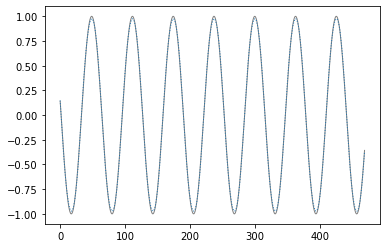

In [6]:
import matplotlib.pyplot as plt
plt.plot(y, label='true',  color='grey', linewidth=1)
plt.plot(y_pred, label='pred', linestyle=':', linewidth=1)